## **LLM VARIABLE EXPERIMENT ANALYSIS**

In [1]:
import pandas as pd

from app.constant.constant import csv_, directories
from analysis.answer import ResearchQuestion1, ResearchQuestion2, ResearchQuestion3

In [2]:
llm_experiment: pd.DataFrame = pd.read_csv(
    csv_.EXPERIMENT_DATA_FILE,
    encoding=csv_.ENCODING, 
    nrows=csv_.EXPECTED_COUNT_ROWS,
    dtype=csv_.COLUMN_DATATYPES
)

In [3]:
llm_experiment.head(3)

,timestamp,pdfDocument,largeLanguageModel,modelName,sentenceEmbeddingModel,dimensionCountVectors,topKSimilarDocuments,pdfPageSize,instructionContextText,query,...,promptLength,instructionLength,queryLength,answerFaithfulnessScore,answerRelevanceScore,contextRelevanceScore,sourcedCited,practicalityScore,llmResponseLength,rephrasedQuestions
0,1745682921,cellar_bb8539b7-b1b5-11ec-9d96-01aa75ed71a1.00...,ChatGPT,gpt-4o,all-MiniLM-L6-v2,384,10,1000,You are a technical assistant for engineers an...,How can we optimize code or firmware to reduce...,...,13474,1539,97,0.0,0.541230,0.00,0.0,0.0,1972.0,What coding practices can reduce CPU/GPU usage...
1,1745683017,cellar_bb8539b7-b1b5-11ec-9d96-01aa75ed71a1.00...,ChatGPT,gpt-4o,all-MiniLM-L6-v2,384,10,1000,You are a technical assistant for engineers an...,Can we design or modify hardware systems (like...,...,12998,1539,180,1.0,0.311480,0.85,1.0,8.0,1500.0,How can hardware systems be engineered to lowe...
2,1745683101,cellar_bb8539b7-b1b5-11ec-9d96-01aa75ed71a1.00...,ChatGPT,gpt-4o,all-MiniLM-L6-v2,384,10,1000,You are a technical assistant for engineers an...,How do we assess the environmental impact of o...,...,12461,1539,126,1.0,0.367517,0.85,1.0,9.0,1102.0,What methods evaluate a system’s environmental...


In [4]:
llm_experiment.describe()

,timestamp,dimensionCountVectors,topKSimilarDocuments,pdfPageSize,tokenLimit,promptLength,instructionLength,queryLength,answerFaithfulnessScore,answerRelevanceScore,contextRelevanceScore,sourcedCited,practicalityScore,llmResponseLength
count,7.690000e+02,769.0,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,1.745686e+09,384.0,5.981795,756.317295,1398.439532,6783.905072,1547.284785,132.629389,0.444250,0.436914,0.370651,0.474512,3.393368,571.609233
std,5.115411e+03,0.0,2.947842,244.158596,633.749309,3243.536905,229.744136,56.901498,0.492103,0.154691,0.437837,0.499558,4.145664,537.551727
min,1.745619e+09,384.0,3.000000,512.000000,1000.000000,1200.000000,1539.000000,97.000000,0.000000,0.165468,0.000000,0.000000,0.000000,8.500000
25%,1.745685e+09,384.0,3.000000,512.000000,1000.000000,4581.000000,1539.000000,111.000000,0.000000,0.311480,0.000000,0.000000,0.000000,40.000000
50%,1.745686e+09,384.0,5.000000,1000.000000,1000.000000,5624.000000,1539.000000,120.000000,0.000000,0.421013,0.000000,0.000000,0.000000,529.000000
75%,1.745688e+09,384.0,10.000000,1000.000000,1800.000000,7560.000000,1539.000000,153.000000,1.000000,0.580147,0.800000,1.000000,8.500000,958.000000
max,1.745689e+09,384.0,10.000000,1000.000000,3000.000000,14240.000000,7910.000000,1539.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3101.000000


In [5]:
llm_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                769 non-null    int32  
 1   pdfDocument              769 non-null    string 
 2   largeLanguageModel       769 non-null    string 
 3   modelName                769 non-null    string 
 4   sentenceEmbeddingModel   769 non-null    string 
 5   dimensionCountVectors    769 non-null    int16  
 6   topKSimilarDocuments     769 non-null    int8   
 7   pdfPageSize              769 non-null    int16  
 8   instructionContextText   769 non-null    string 
 9   query                    769 non-null    string 
 10  topKDocuments            769 non-null    string 
 11  lmmResponse              769 non-null    string 
 12  tokenLimit               769 non-null    int16  
 13  promptLength             769 non-null    int16  
 14  instructionLength        7

In [6]:
llm_experiment["practicalityScore"] = llm_experiment["practicalityScore"] / 10.0

### **QUESTION 1: How does retrieval page size (i.e., the number of documents retrieved) impact the relevance and completeness of technical requirement generation?**

===GENERAL INFORMATION 'PAGE SIZE'===

Number of samples per page size:
pdfPageSize
1000    385
512     384
Name: count, dtype: int64

Summary statistics for page size 512:
       answerRelevanceScore  answerFaithfulnessScore  contextRelevanceScore  \
count            384.000000               384.000000             384.000000   
mean               0.438345                 0.423768               0.354789   
std                0.156177                 0.492184               0.434841   
min                0.165468                 0.000000               0.000000   
25%                0.311480                 0.000000               0.000000   
50%                0.421013                 0.000000               0.000000   
75%                0.580147                 1.000000               0.800000   
max                1.000000                 1.000000               1.000000   

       practicalityScore  
count         384.000000  
mean            0.327214  
std             0.413032  
min    

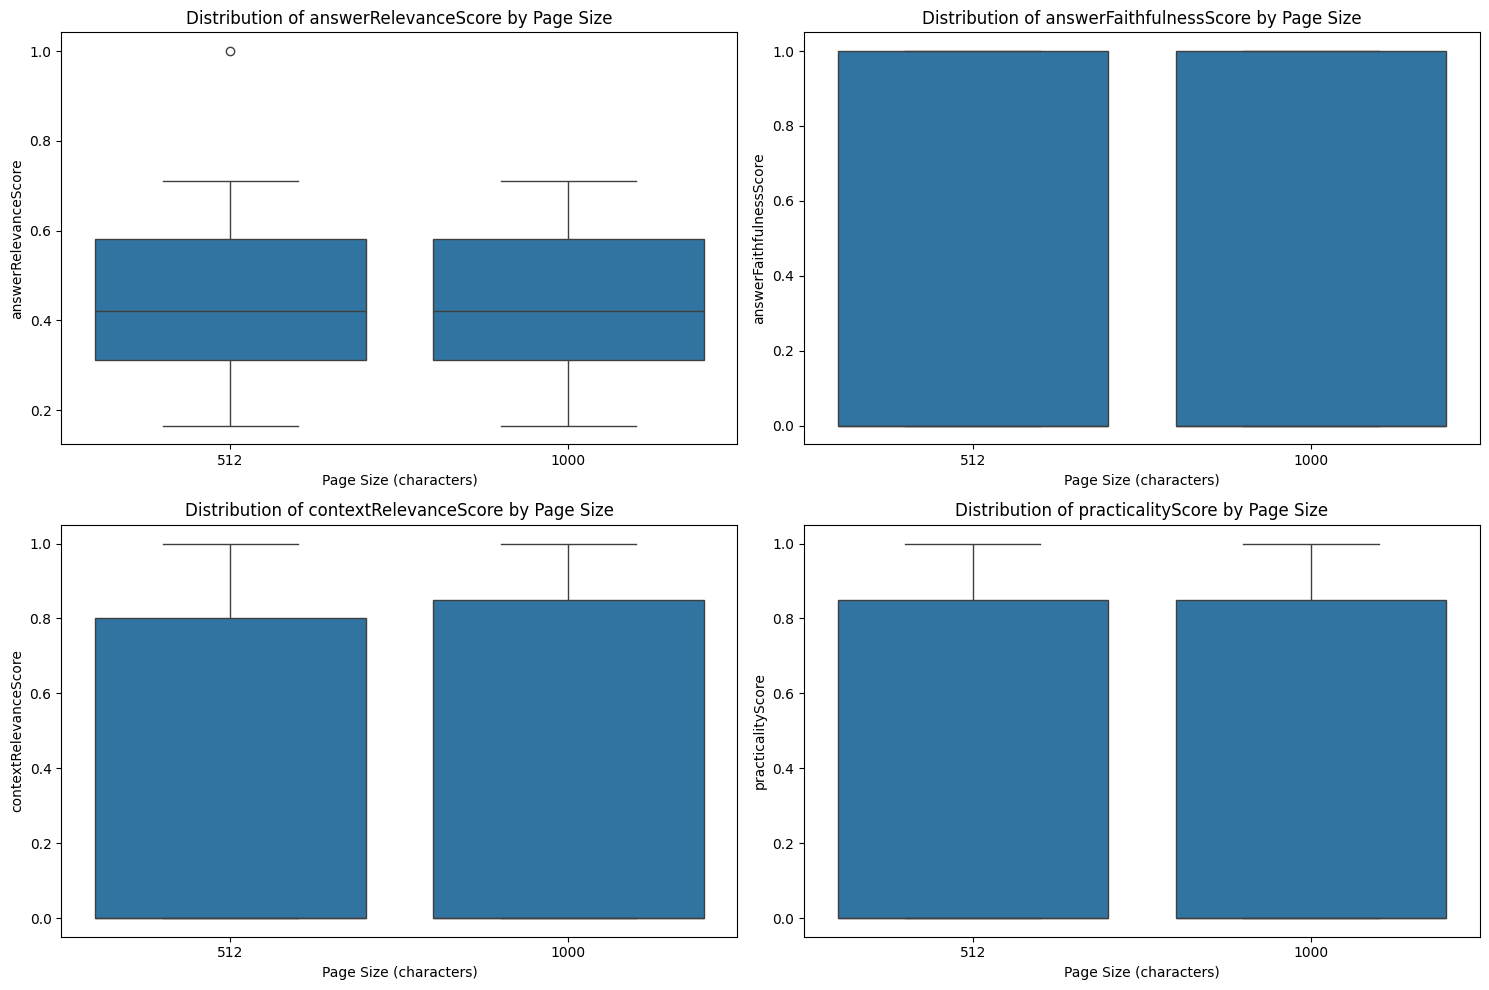


Percentage changes from 512 to 1000 characters:
answerRelevanceScore: 0.65197% decrease
answerFaithfulnessScore: 9.65379% increase
contextRelevanceScore: 8.93004% increase
practicalityScore: 7.40038% increase


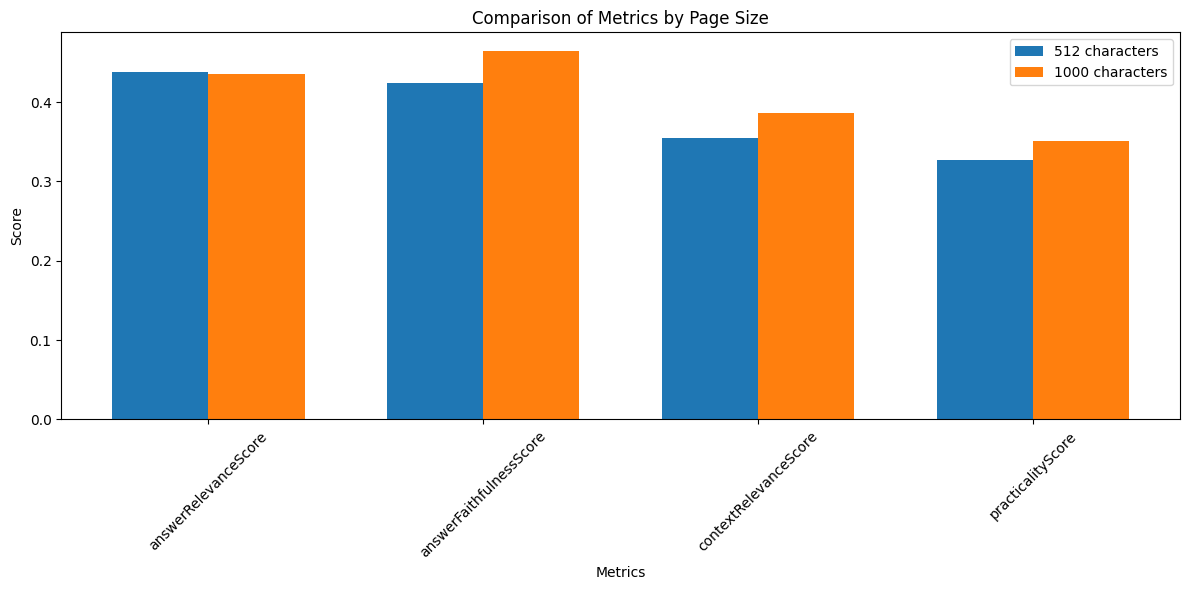


==STATISTICAL COMPARISON (T-TEST)==


answerRelevanceScore:
  512 chars (n=384): mean = 0.4383, std = 0.1562
  1000 chars (n=385): mean = 0.4355, std = 0.1534
  t-statistic: 0.2559995759071248
  p-value: 0.7980198355057613
  Cohen's d effect size: -0.018463393784542176
  Significance: Not significant at α=0.05
No significance found for answerRelevanceScore
-------------------------------------------------------------------------------------

answerFaithfulnessScore:
  512 chars (n=384): mean = 0.4238, std = 0.4922
  1000 chars (n=385): mean = 0.4647, std = 0.4918
  t-statistic: -1.1529095011060784
  p-value: 0.2493067083309146
  Cohen's d effect size: 0.08315007096784102
  Significance: Not significant at α=0.05
No significance found for answerFaithfulnessScore
-------------------------------------------------------------------------------------

contextRelevanceScore:
  512 chars (n=384): mean = 0.3548, std = 0.4348
  1000 chars (n=385): mean = 0.3865, std = 0.4408
  t-statistic: -1.

In [7]:
ResearchQuestion1(llm_experiment).answer()

# **How do different large language models (e.g., GPT-4o, Gemini 2.0 Flash) respond to variable changes within a RAG system?**


===1. DATA EXPLORATION===
Dataset shape: (769, 24)
Distribution of models in dataset:
modelName
gpt-4o       387
2.0 Flash    382
Name: count, dtype: Int64

Basic statistics for RAG variables:
       queryLength  topKSimilarDocuments  pdfPageSize  promptLength
count   769.000000            769.000000   769.000000    769.000000
mean    132.629389              5.981795   756.317295   6783.905072
std      56.901498              2.947842   244.158596   3243.536905
min      97.000000              3.000000   512.000000   1200.000000
25%     111.000000              3.000000   512.000000   4581.000000
50%     120.000000              5.000000  1000.000000   5624.000000
75%     153.000000             10.000000  1000.000000   7560.000000
max    1539.000000             10.000000  1000.000000  14240.000000


C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:400: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="modelName", data=self.__llm_experiment, palette=["#3498db", "#e74c3c"])


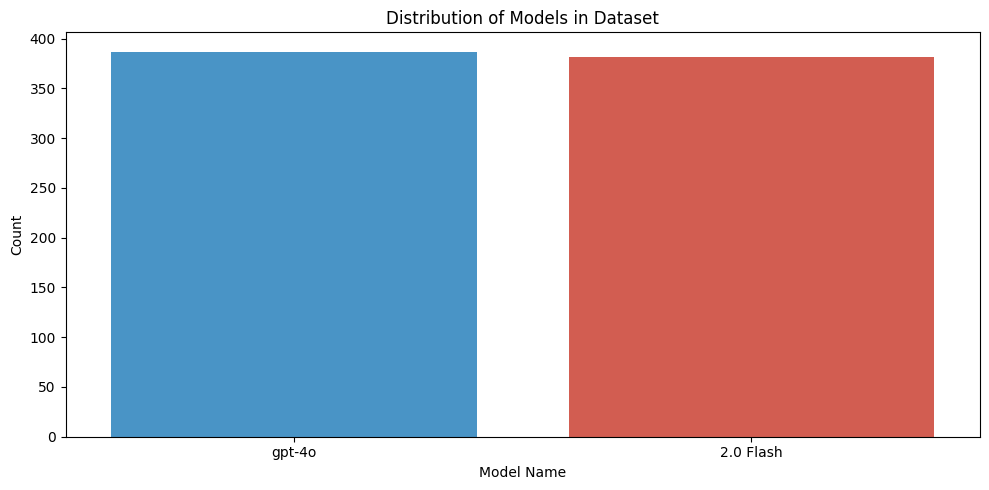

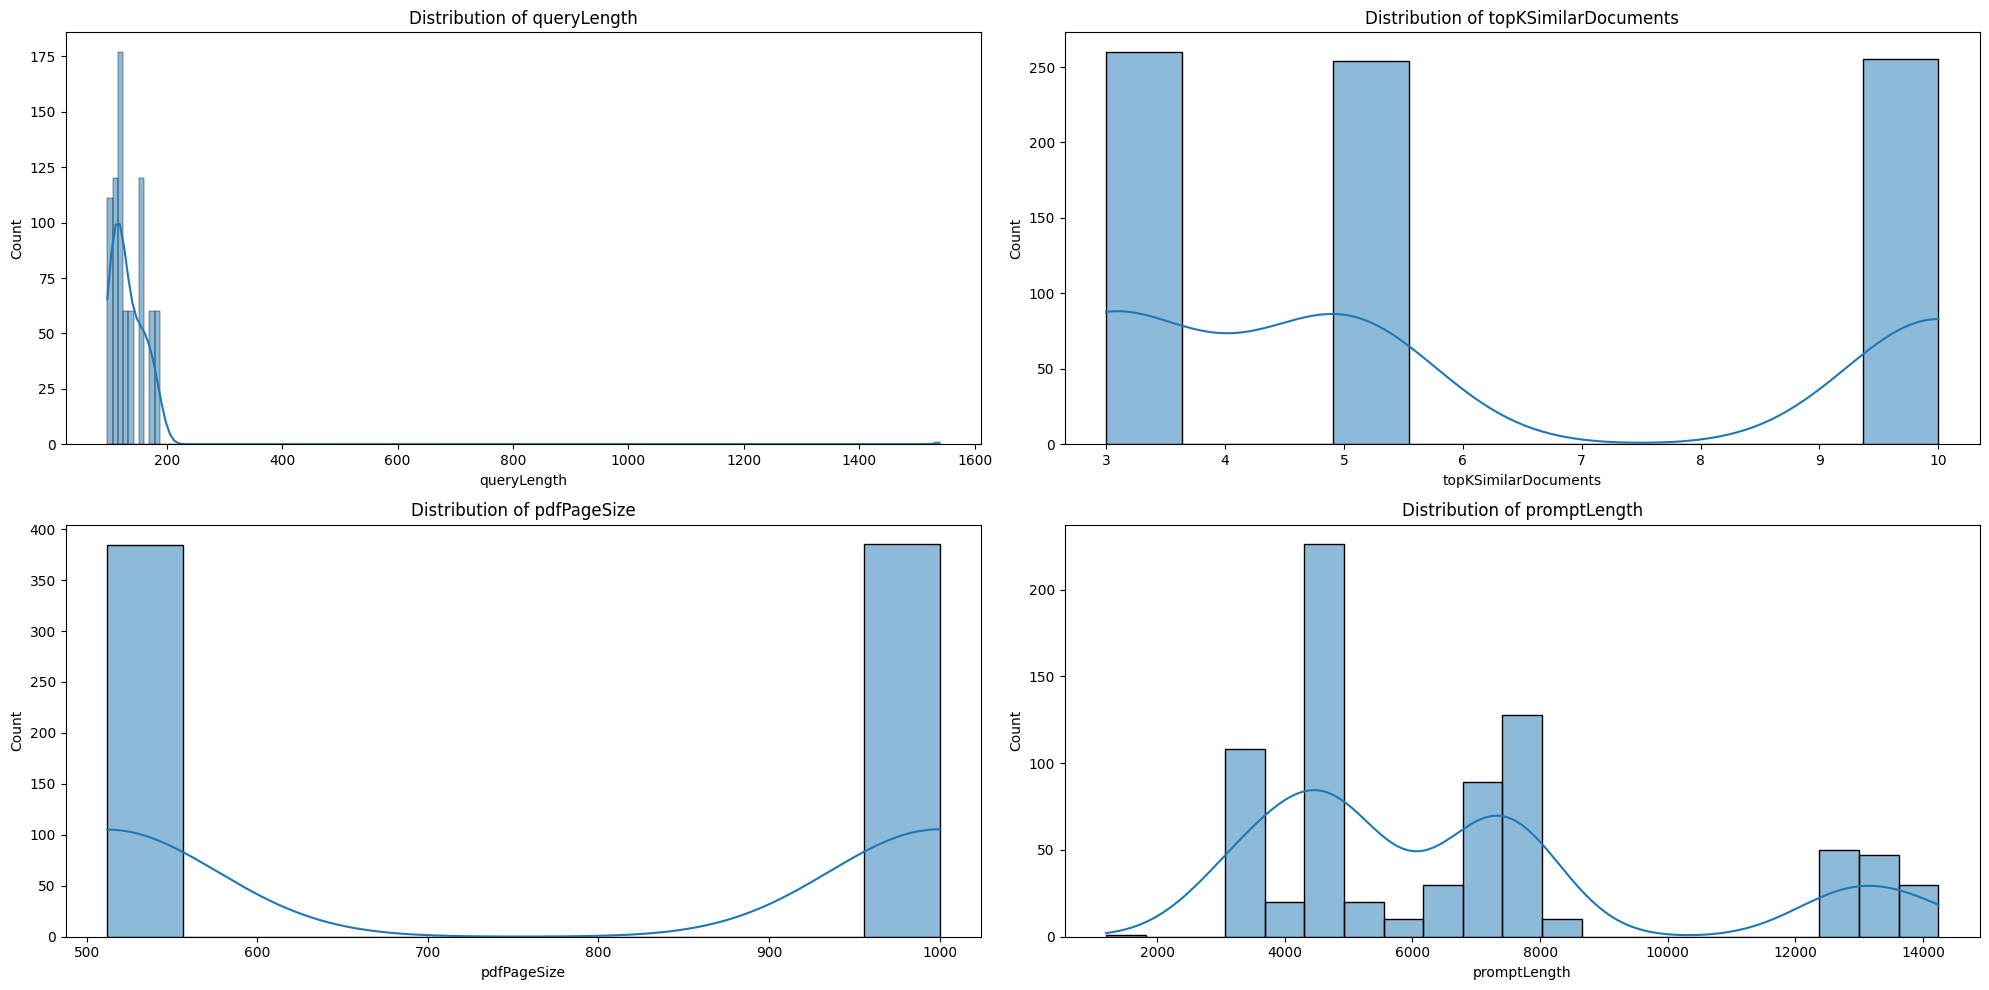


===2. MODEL COMPARISON ACROSS METRICS===

Performance metrics by model:
          answerFaithfulnessScore                 answerRelevanceScore  \
                             mean       std count                 mean   
modelName                                                                
2.0 Flash                 0.35138  0.470770   382             0.436103   
gpt-4o                    0.53592  0.496093   387             0.437715   

                          contextRelevanceScore                 sourcedCited  \
                std count                  mean       std count         mean   
modelName                                                                      
2.0 Flash  0.153916   382              0.277944  0.407187   382     0.390052   
gpt-4o     0.155647   387              0.462160  0.448176   387     0.557881   

                          practicalityScore                 llmResponseLength  \
                std count              mean       std count              m

C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:437: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="modelName", y=metric, data=self.__llm_experiment, palette=["#3498db", "#e74c3c"])
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:437: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="modelName", y=metric, data=self.__llm_experiment, palette=["#3498db", "#e74c3c"])
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:437: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="modelName", y=metric, data=self.__llm_experiment, palette=["#3498db"

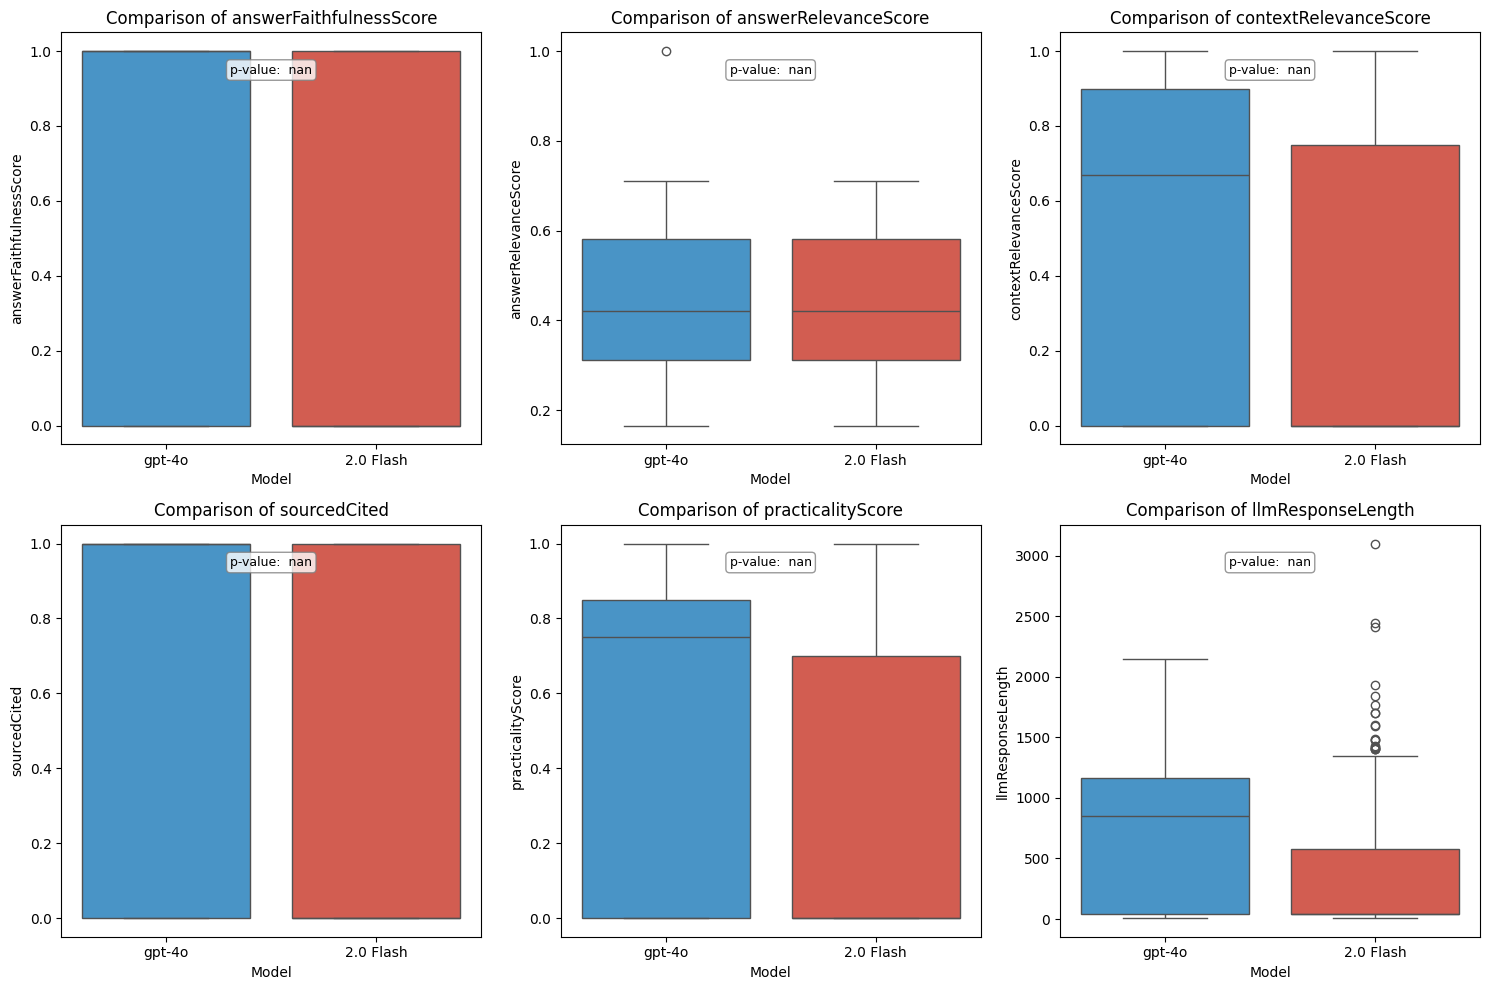

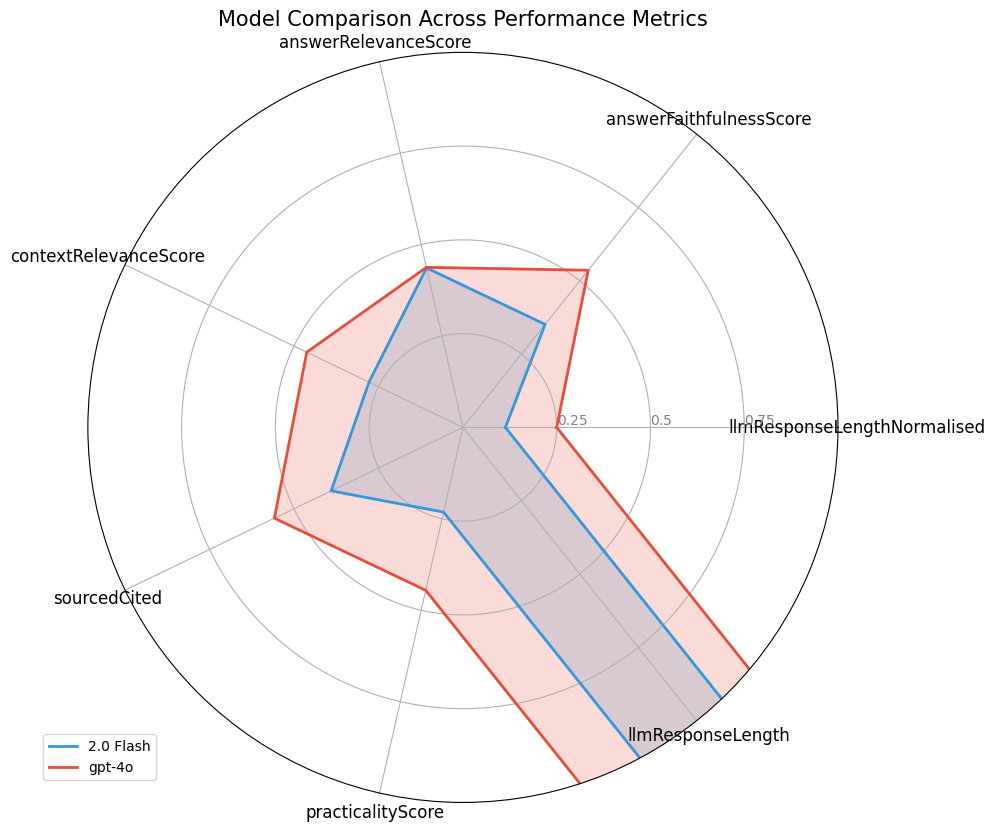


Model comparison - mean values:    modelName  answerFaithfulnessScore  answerRelevanceScore  \
0  2.0 Flash                  0.35138              0.436103   
1     gpt-4o                  0.53592              0.437715   

   contextRelevanceScore  sourcedCited  practicalityScore  llmResponseLength  \
0               0.277944      0.390052           0.231675         358.759162   
1               0.462160      0.557881           0.445607         781.709302   

   llmResponseLengthNormalised  
0                     0.113261  
1                     0.250027  


===3. CORRELATION ANALYSIS===


Correlations for model: gpt-4o


Correlations between RAG variables and performance metrics:


queryLength correlations:
	- answerFaithfulnessScore: 0.059183 
	- answerRelevanceScore: -0.047726 
	- contextRelevanceScore: 0.036286 
	- sourcedCited: 0.049311 
	- practicalityScore: -0.031768 
	- llmResponseLength: -0.032495 
	- llmResponseLengthNormalised: -0.032495 

topKSimilarDocuments correlations:


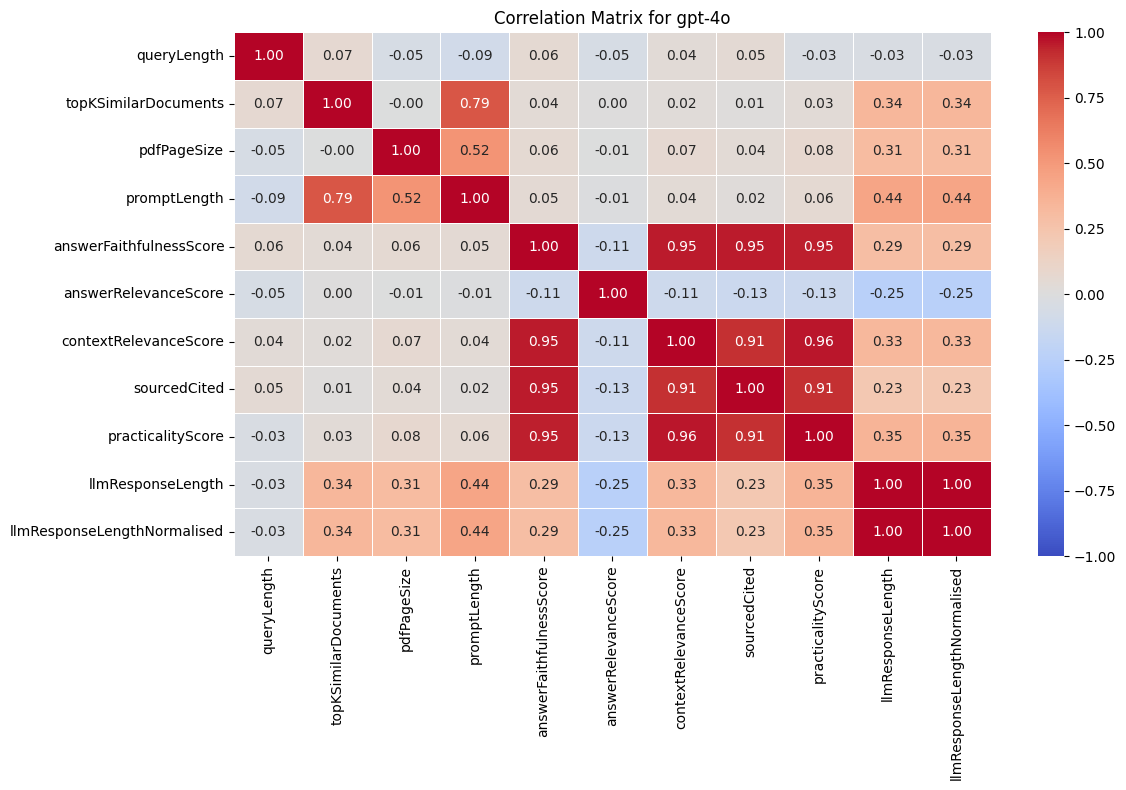


Correlations for model: 2.0 Flash


Correlations between RAG variables and performance metrics:


queryLength correlations:
	- answerFaithfulnessScore: -0.086708 
	- answerRelevanceScore: -0.669634 *
	- contextRelevanceScore: -0.074729 
	- sourcedCited: -0.014691 
	- practicalityScore: -0.073820 
	- llmResponseLength: -0.042147 
	- llmResponseLengthNormalised: -0.042147 

topKSimilarDocuments correlations:
	- answerFaithfulnessScore: 0.156909 *
	- answerRelevanceScore: -0.006297 
	- contextRelevanceScore: 0.185124 *
	- sourcedCited: 0.136469 *
	- practicalityScore: 0.185928 *
	- llmResponseLength: 0.300546 *
	- llmResponseLengthNormalised: 0.300546 *

pdfPageSize correlations:
	- answerFaithfulnessScore: 0.022678 
	- answerRelevanceScore: -0.012075 
	- contextRelevanceScore: 0.001665 
	- sourcedCited: 0.016101 
	- practicalityScore: -0.025203 
	- llmResponseLength: 0.139300 *
	- llmResponseLengthNormalised: 0.139300 *

promptLength correlations:
	- answerFaithfulnessScore: 0.135782 *


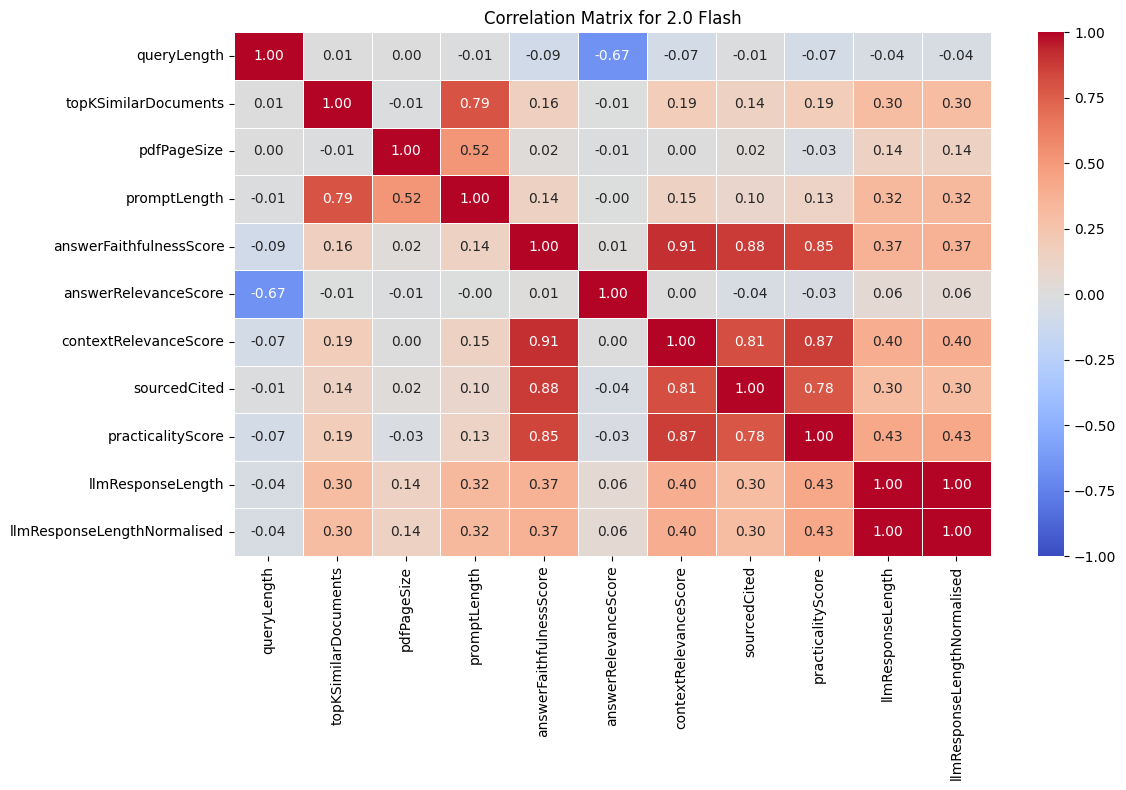


===4. RAG VARIABLES IMPACT ANALYSIS===


Analyzing impact of queryLength on model performance:


C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f"{model}: r={correlation:.4f},"
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:577: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f" p={p_value:.4f}",
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f"{model}: r={correlation:.4f},"
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:577: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f" p={p_value:.4f}",
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different beh

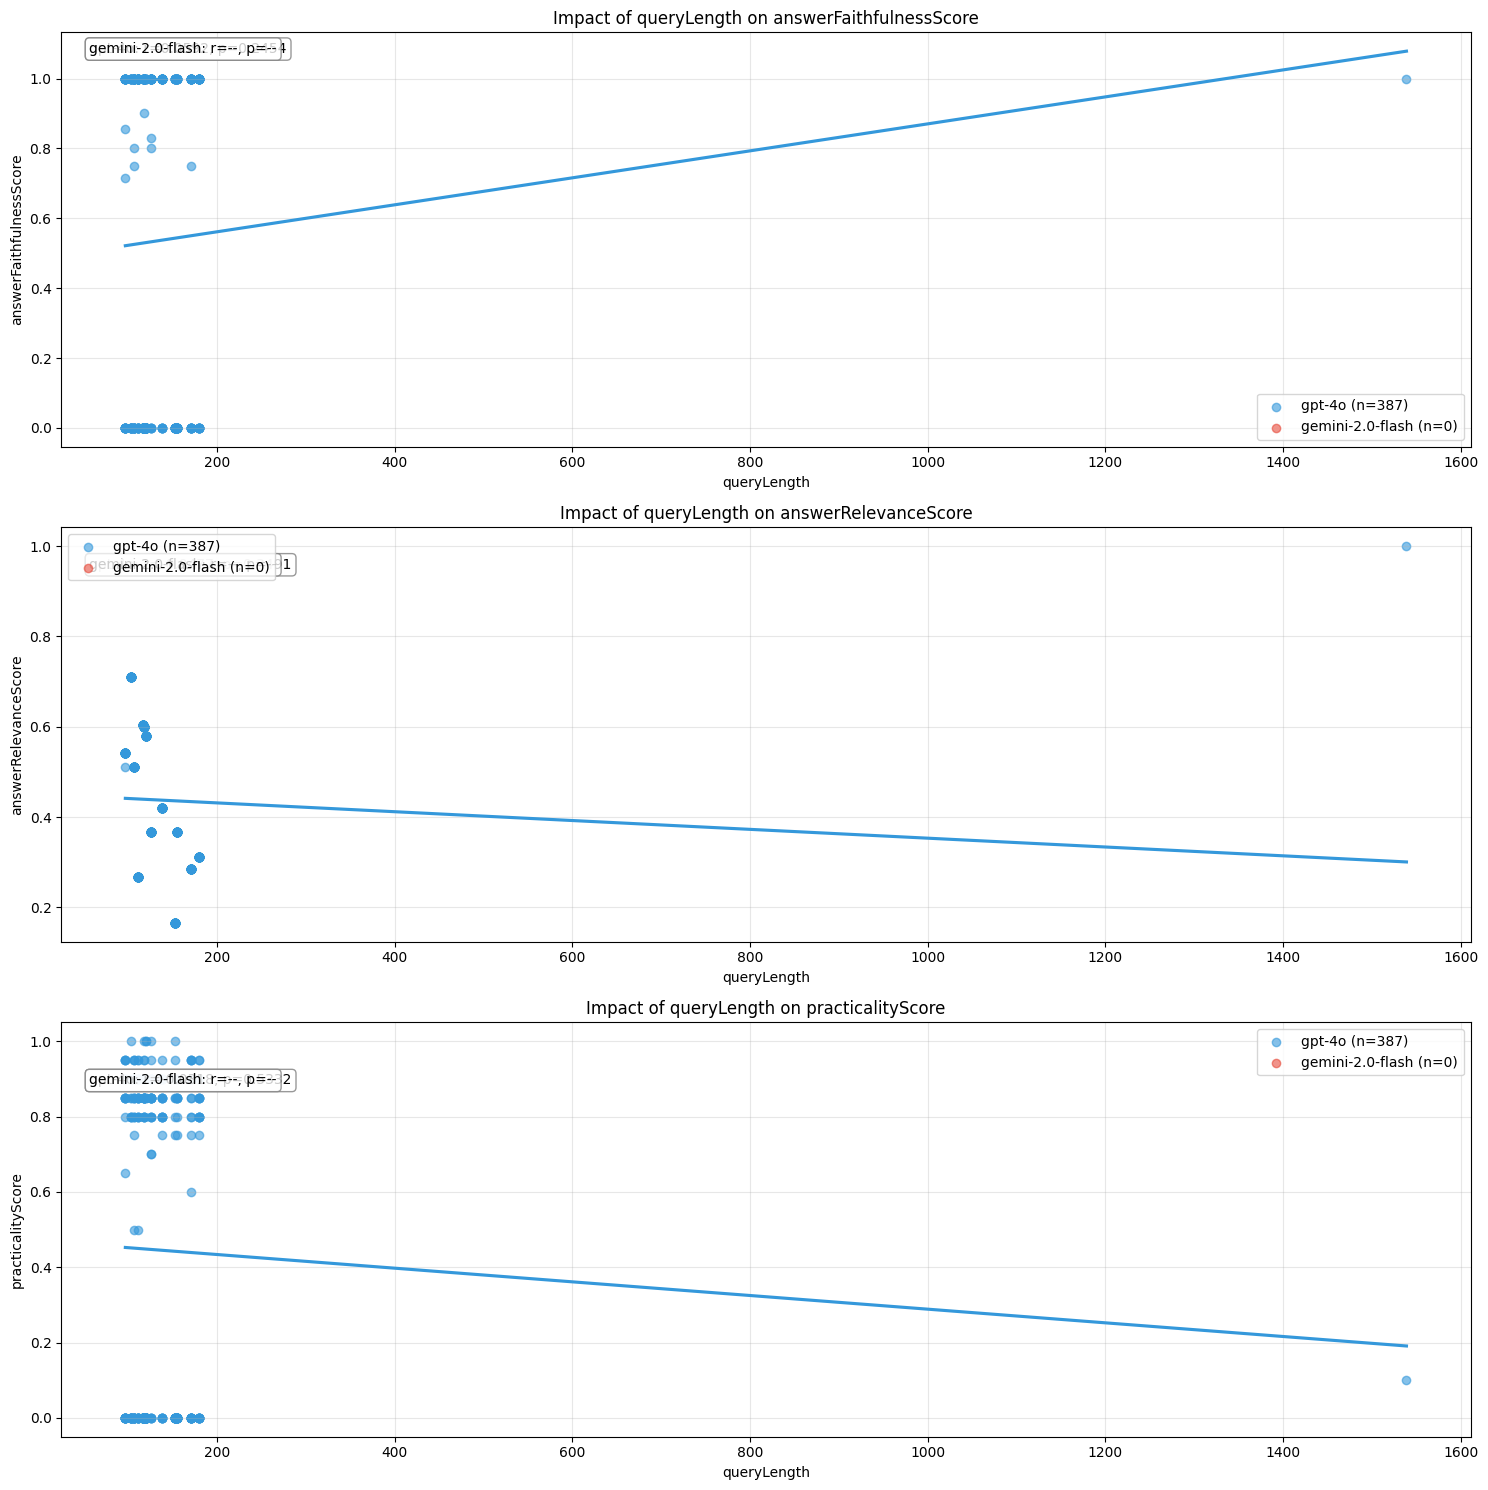


Analyzing impact of topKSimilarDocuments on model performance:


C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f"{model}: r={correlation:.4f},"
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:577: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f" p={p_value:.4f}",
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f"{model}: r={correlation:.4f},"
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:577: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f" p={p_value:.4f}",
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different beh

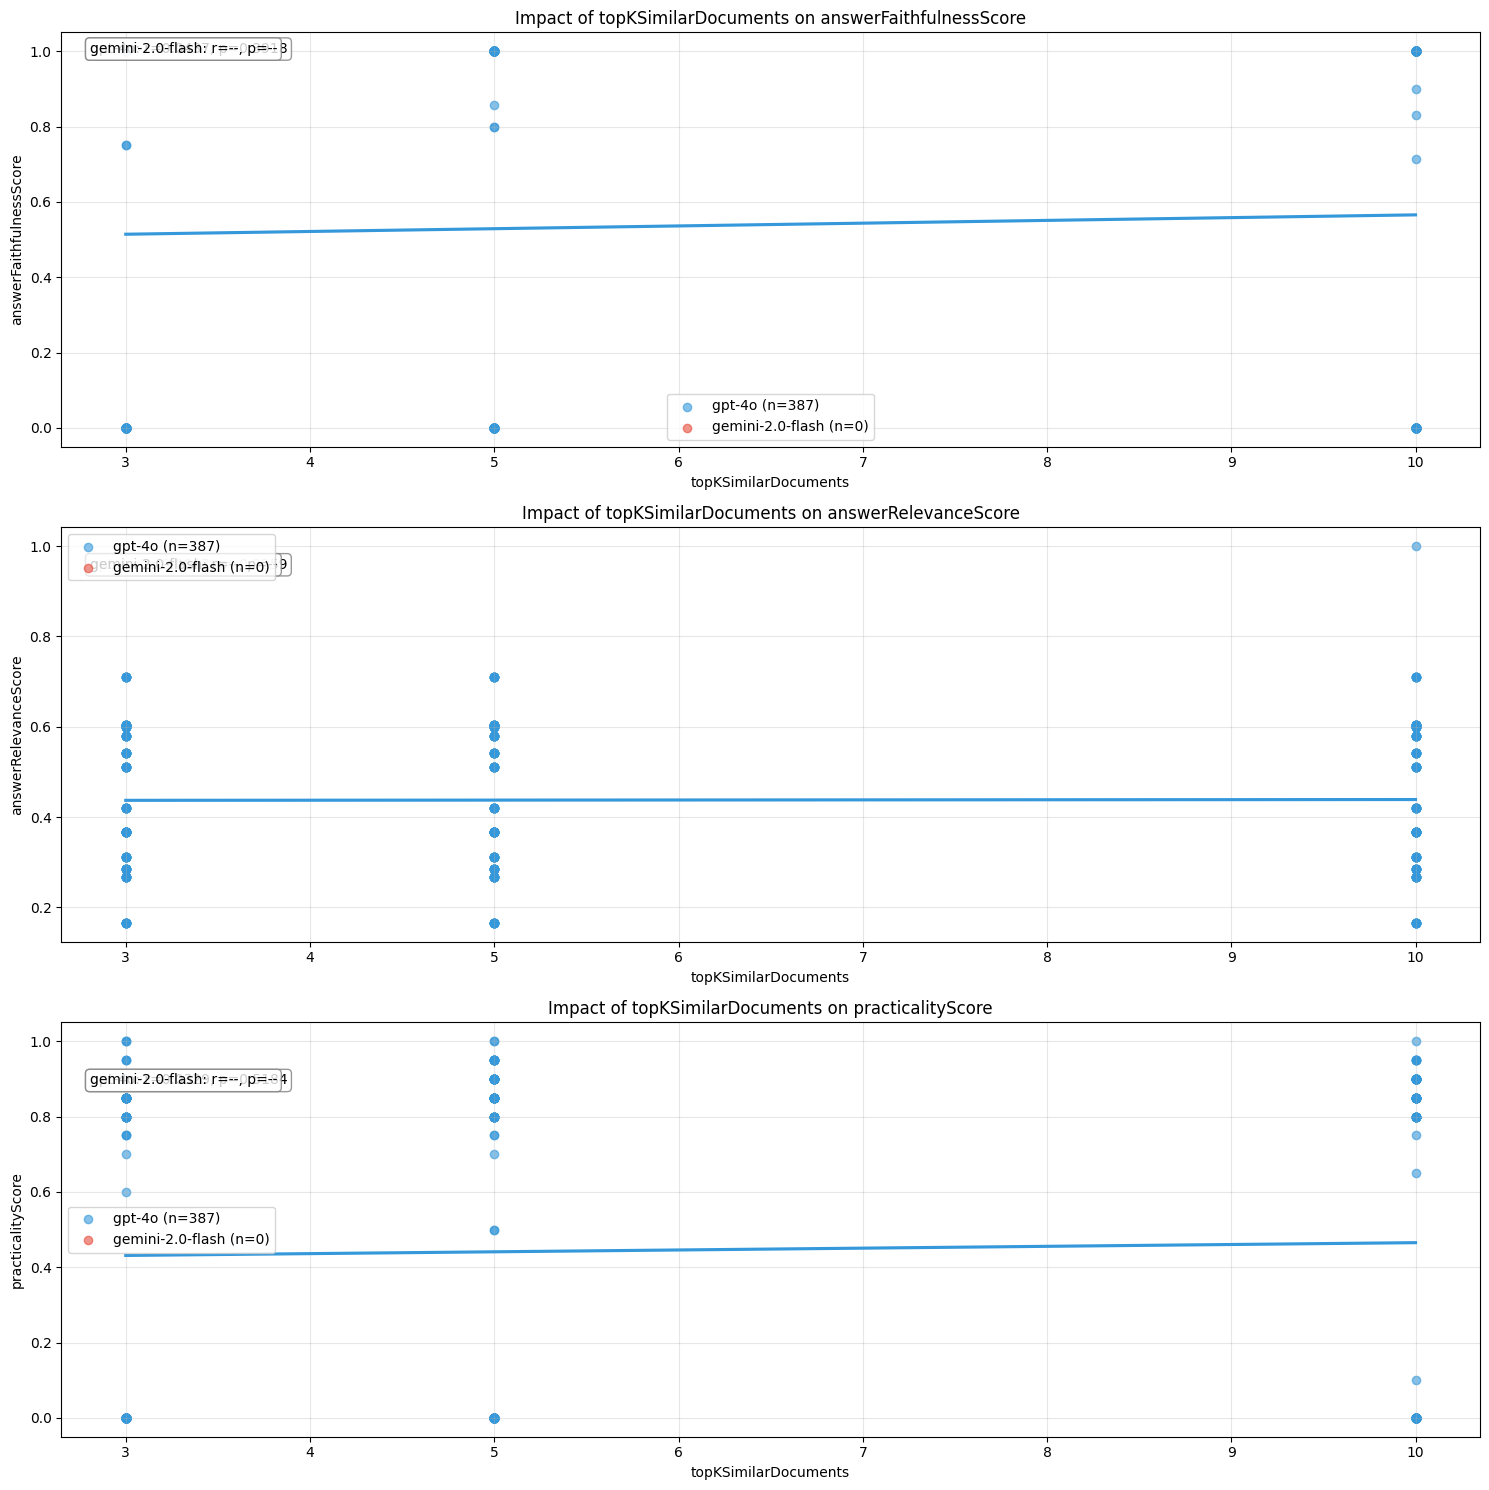


Analyzing impact of pdfPageSize on model performance:


C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f"{model}: r={correlation:.4f},"
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:577: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f" p={p_value:.4f}",
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f"{model}: r={correlation:.4f},"
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:577: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f" p={p_value:.4f}",
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different beh

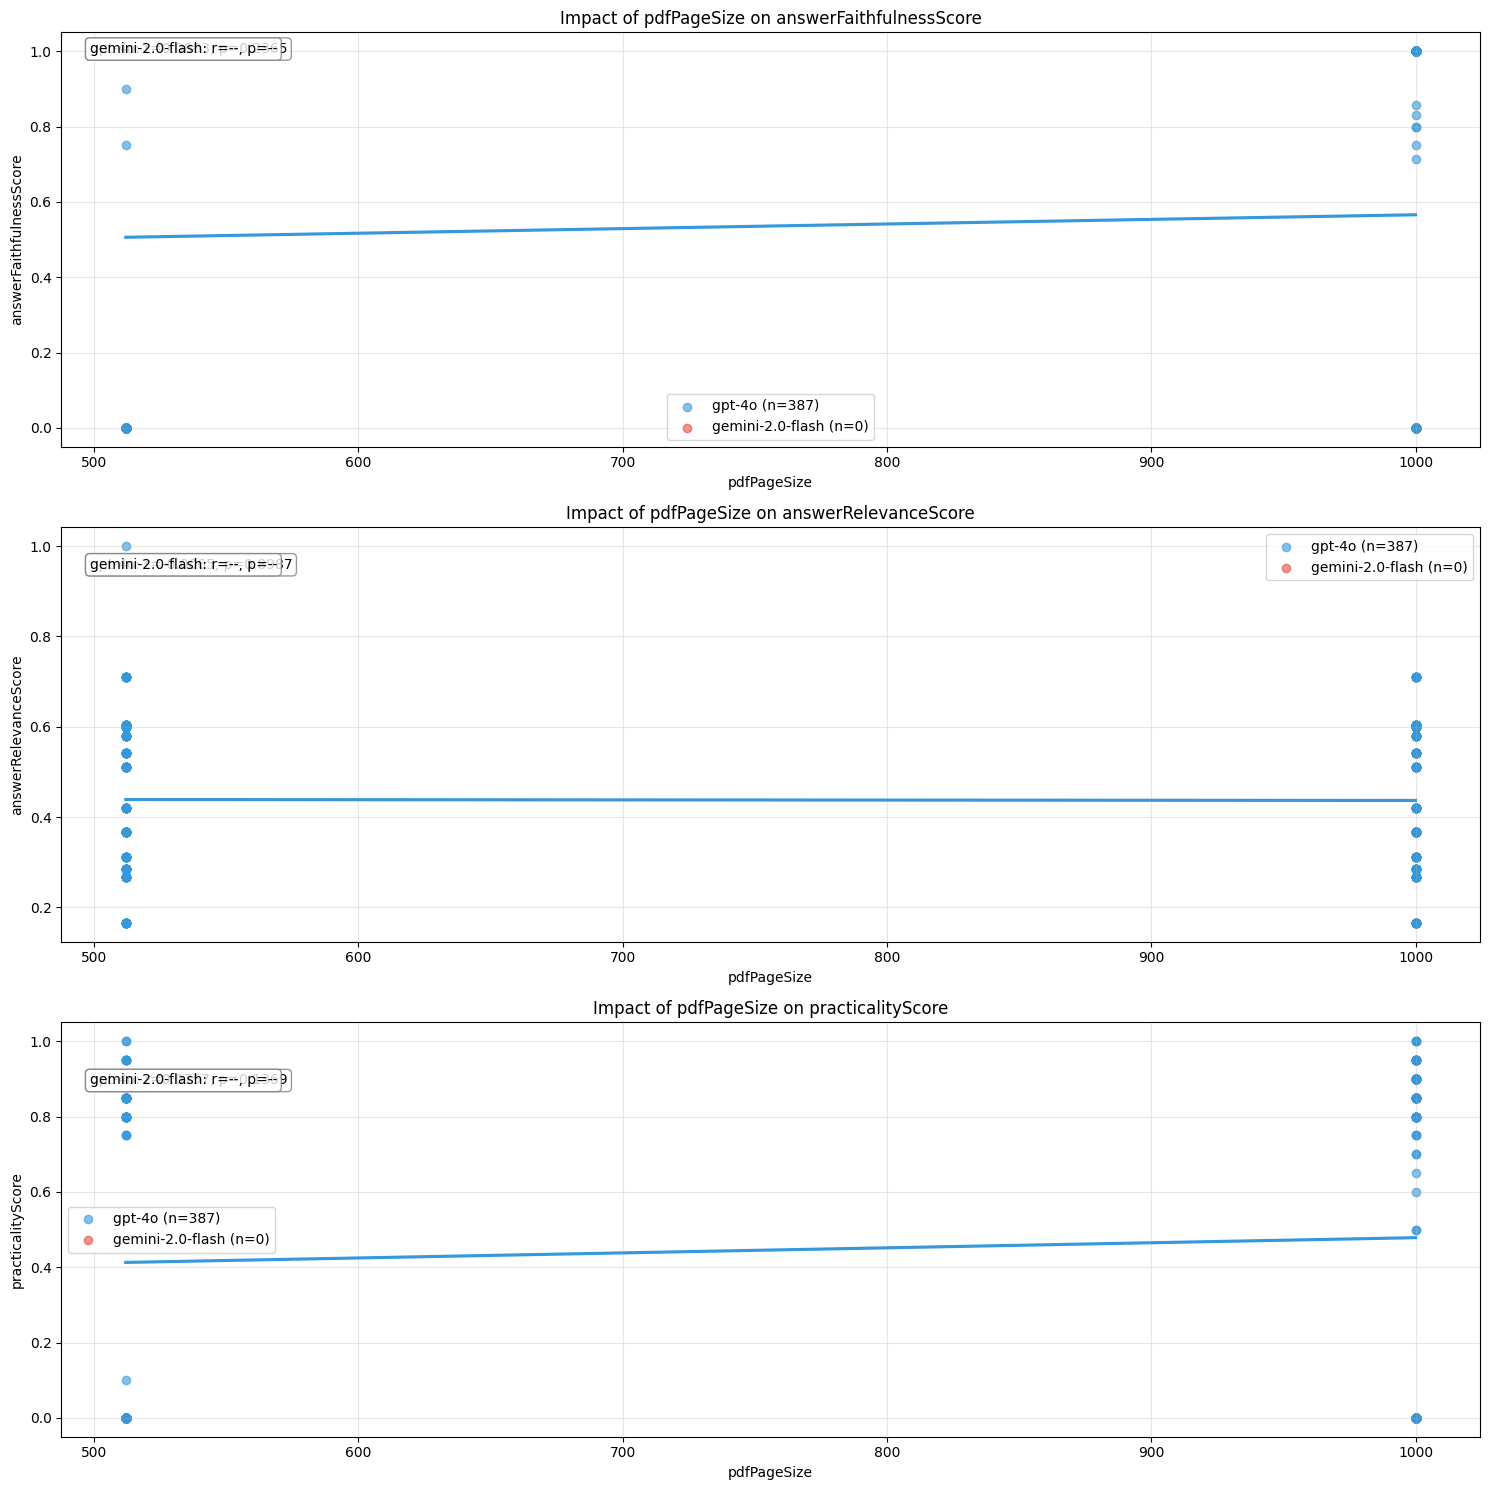


Analyzing impact of promptLength on model performance:


C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f"{model}: r={correlation:.4f},"
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:577: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f" p={p_value:.4f}",
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f"{model}: r={correlation:.4f},"
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:577: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f" p={p_value:.4f}",
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:576: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different beh

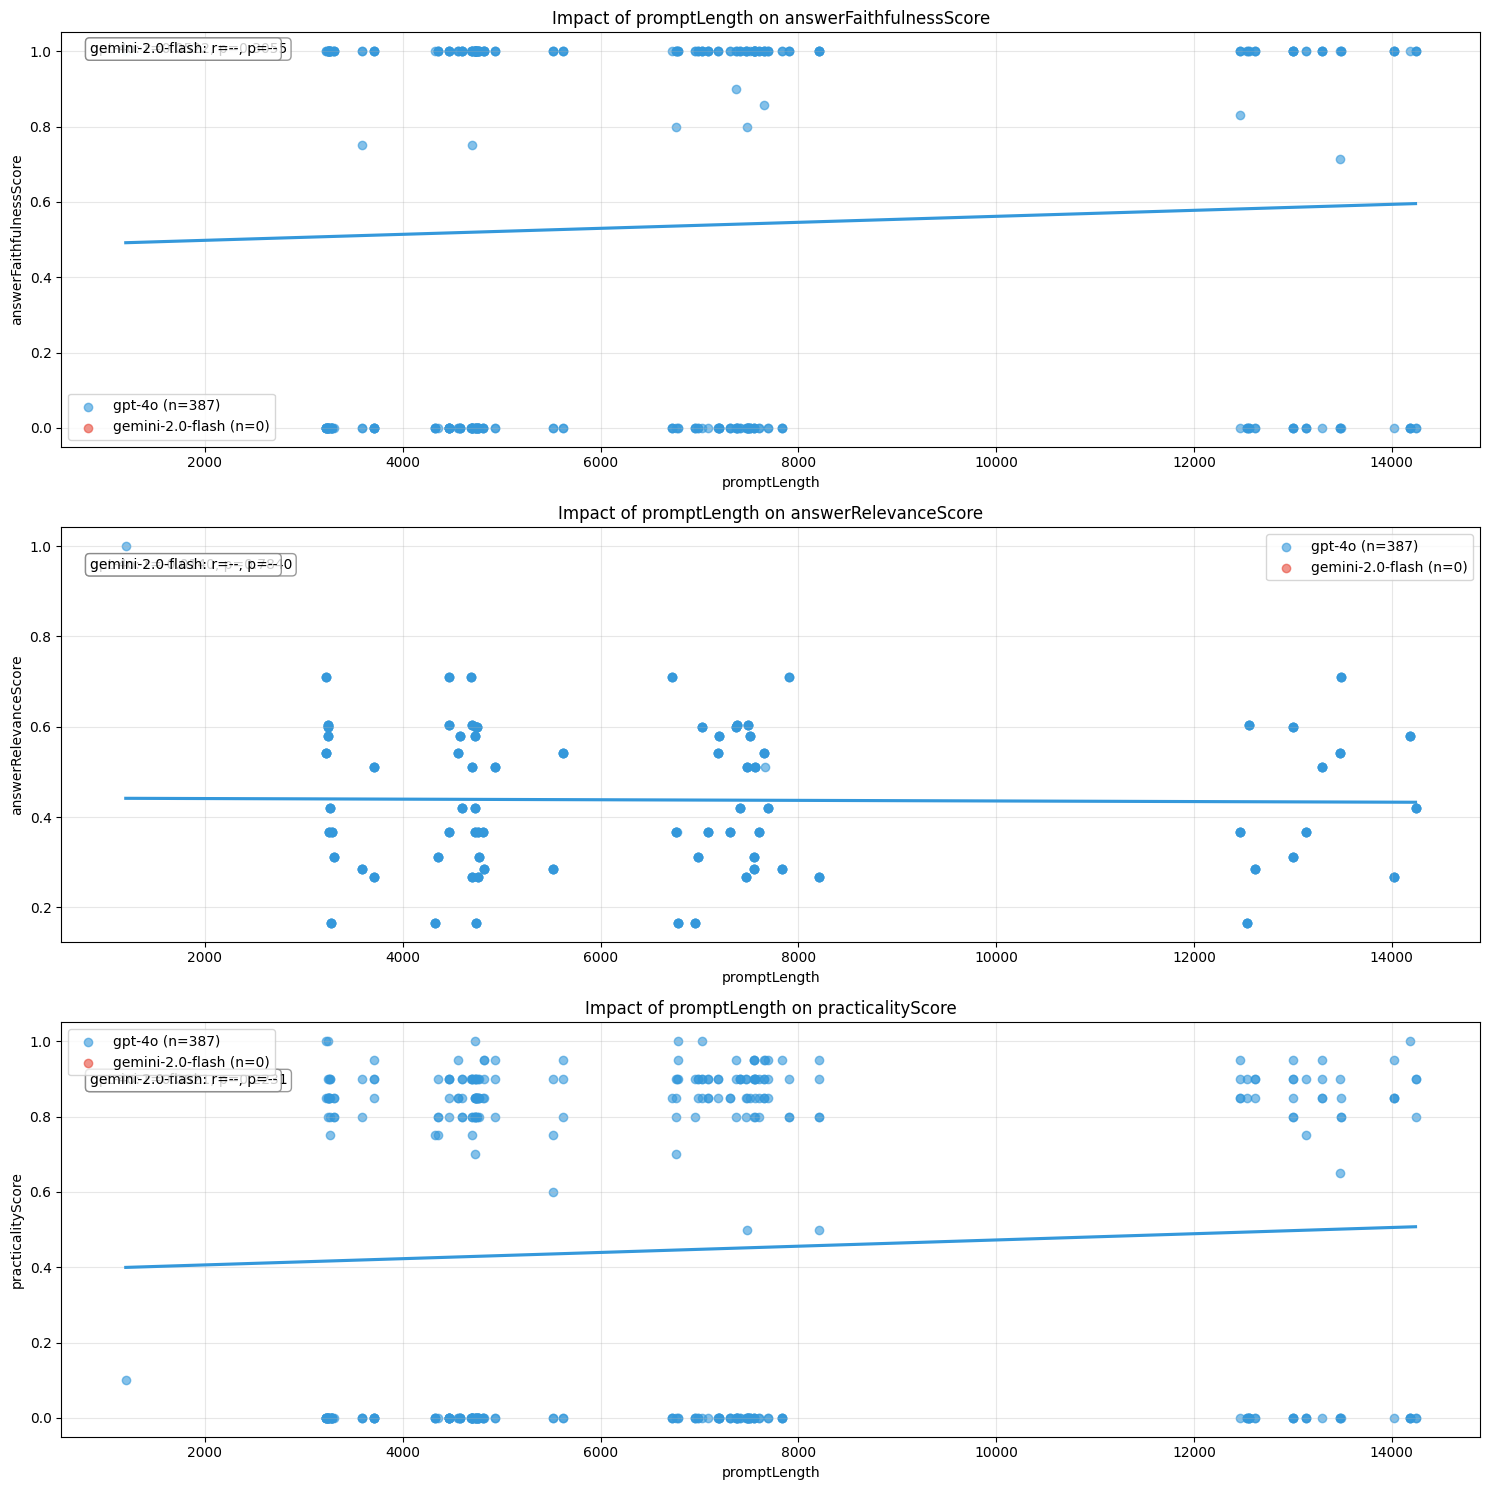


===8. SUMMARY OF FINDINGS===

Overall performance comparison:
          answerFaithfulnessScore           answerRelevanceScore            \
                             mean       std                 mean       std   
modelName                                                                    
2.0 Flash                 0.35138  0.470770             0.436103  0.153916   
gpt-4o                    0.53592  0.496093             0.437715  0.155647   

          contextRelevanceScore           sourcedCited            \
                           mean       std         mean       std   
modelName                                                          
2.0 Flash              0.277944  0.407187     0.390052  0.488401   
gpt-4o                 0.462160  0.448176     0.557881  0.497047   

          practicalityScore           llmResponseLength              \
                       mean       std              mean         std   
modelName                                                      

In [8]:
ResearchQuestion2(llm_experiment).answer()

# **With which variable configuration (parameters) are the LLMs’ answers most understandable and actionable are the technical requirements generated for infrastructure engineers and software developers?**

Analyzing which variable configurations produce the most understandable and actionable technical requirements...



===EDA RESULTS===

{'target_stats':        answerFaithfulnessScore  answerRelevanceScore  contextRelevanceScore  \
count               769.000000            769.000000             769.000000   
mean                  0.444250              0.436914               0.370651   
std                   0.492103              0.154691               0.437837   
min                   0.000000              0.165468               0.000000   
25%                   0.000000              0.311480               0.000000   
50%                   0.000000              0.421013               0.000000   
75%                   1.000000              0.580147               0.800000   
max                   1.000000              1.000000               1.000000   

       practicalityScore  composite_score  
count         769.000000       769.000000  
mean            0.339337         0.403215  
std 

C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:1134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means: pd.DataFrame = self.__llm_experiment.groupby(f"{parameter}_bin")["composite_score"].mean().sort_values(ascending=False)
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:1141: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_bin_means = self.__llm_experiment.groupby(f"{parameter}_bin")[target].mean().sort_values(
C:\Users\Jowgo\Downloads\thesis\analysis\answer.py:1134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

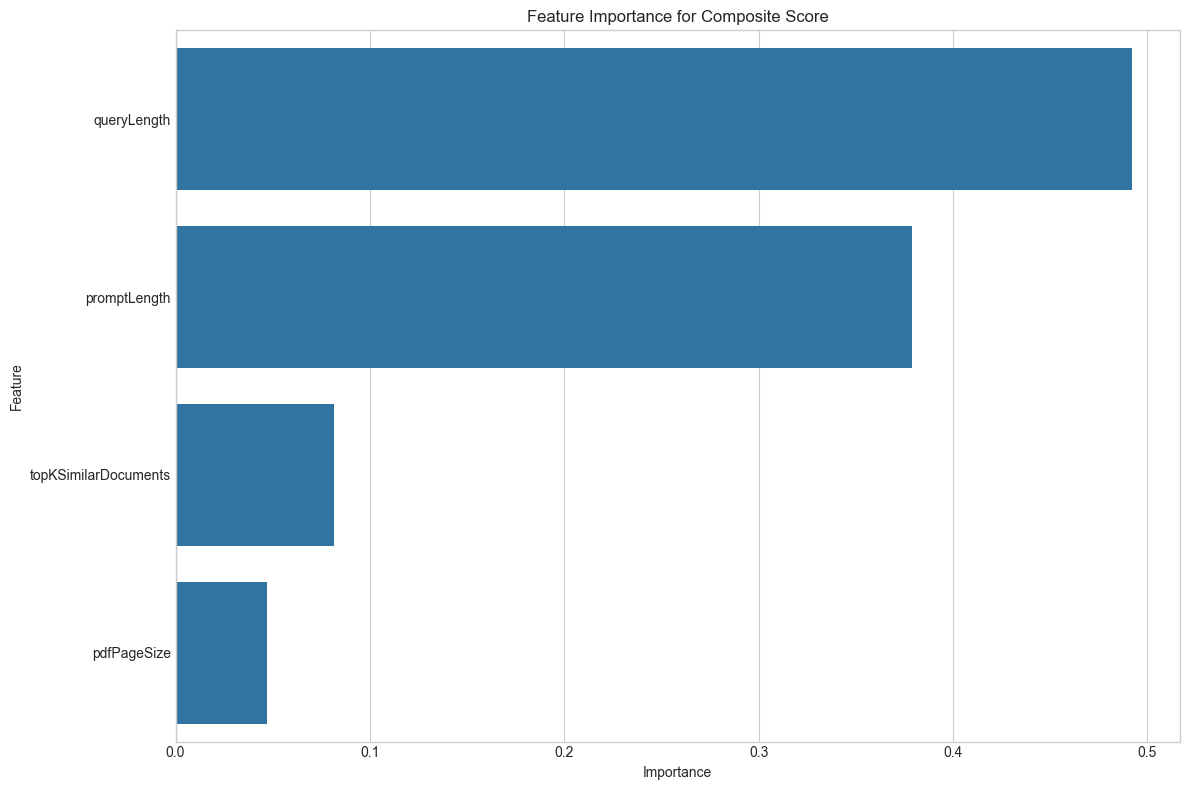

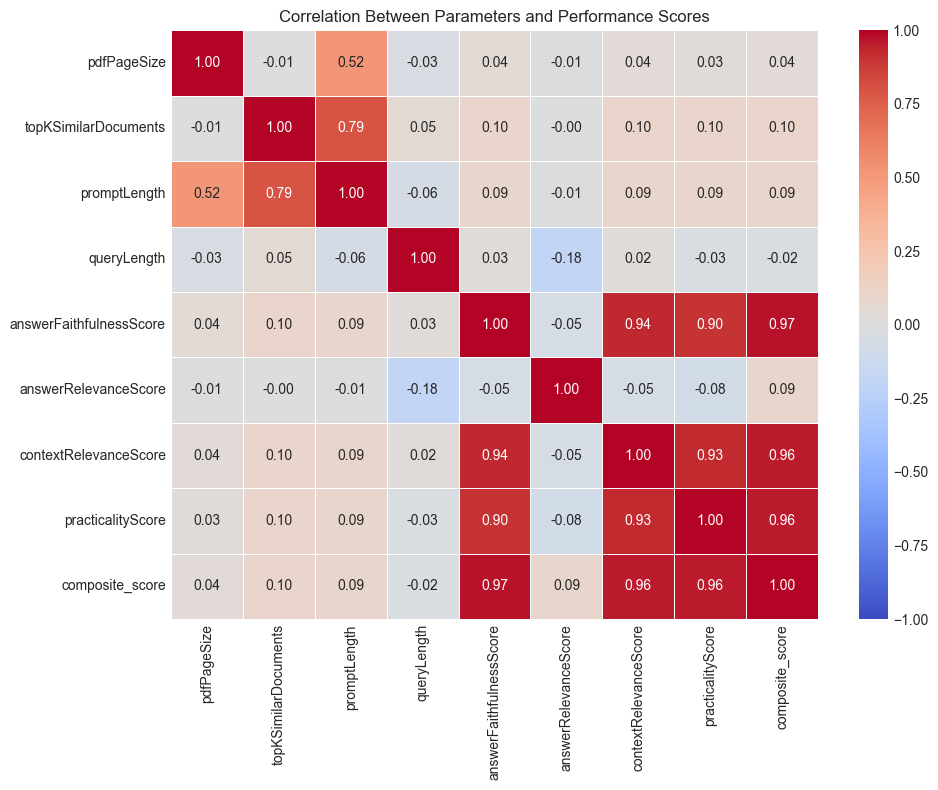

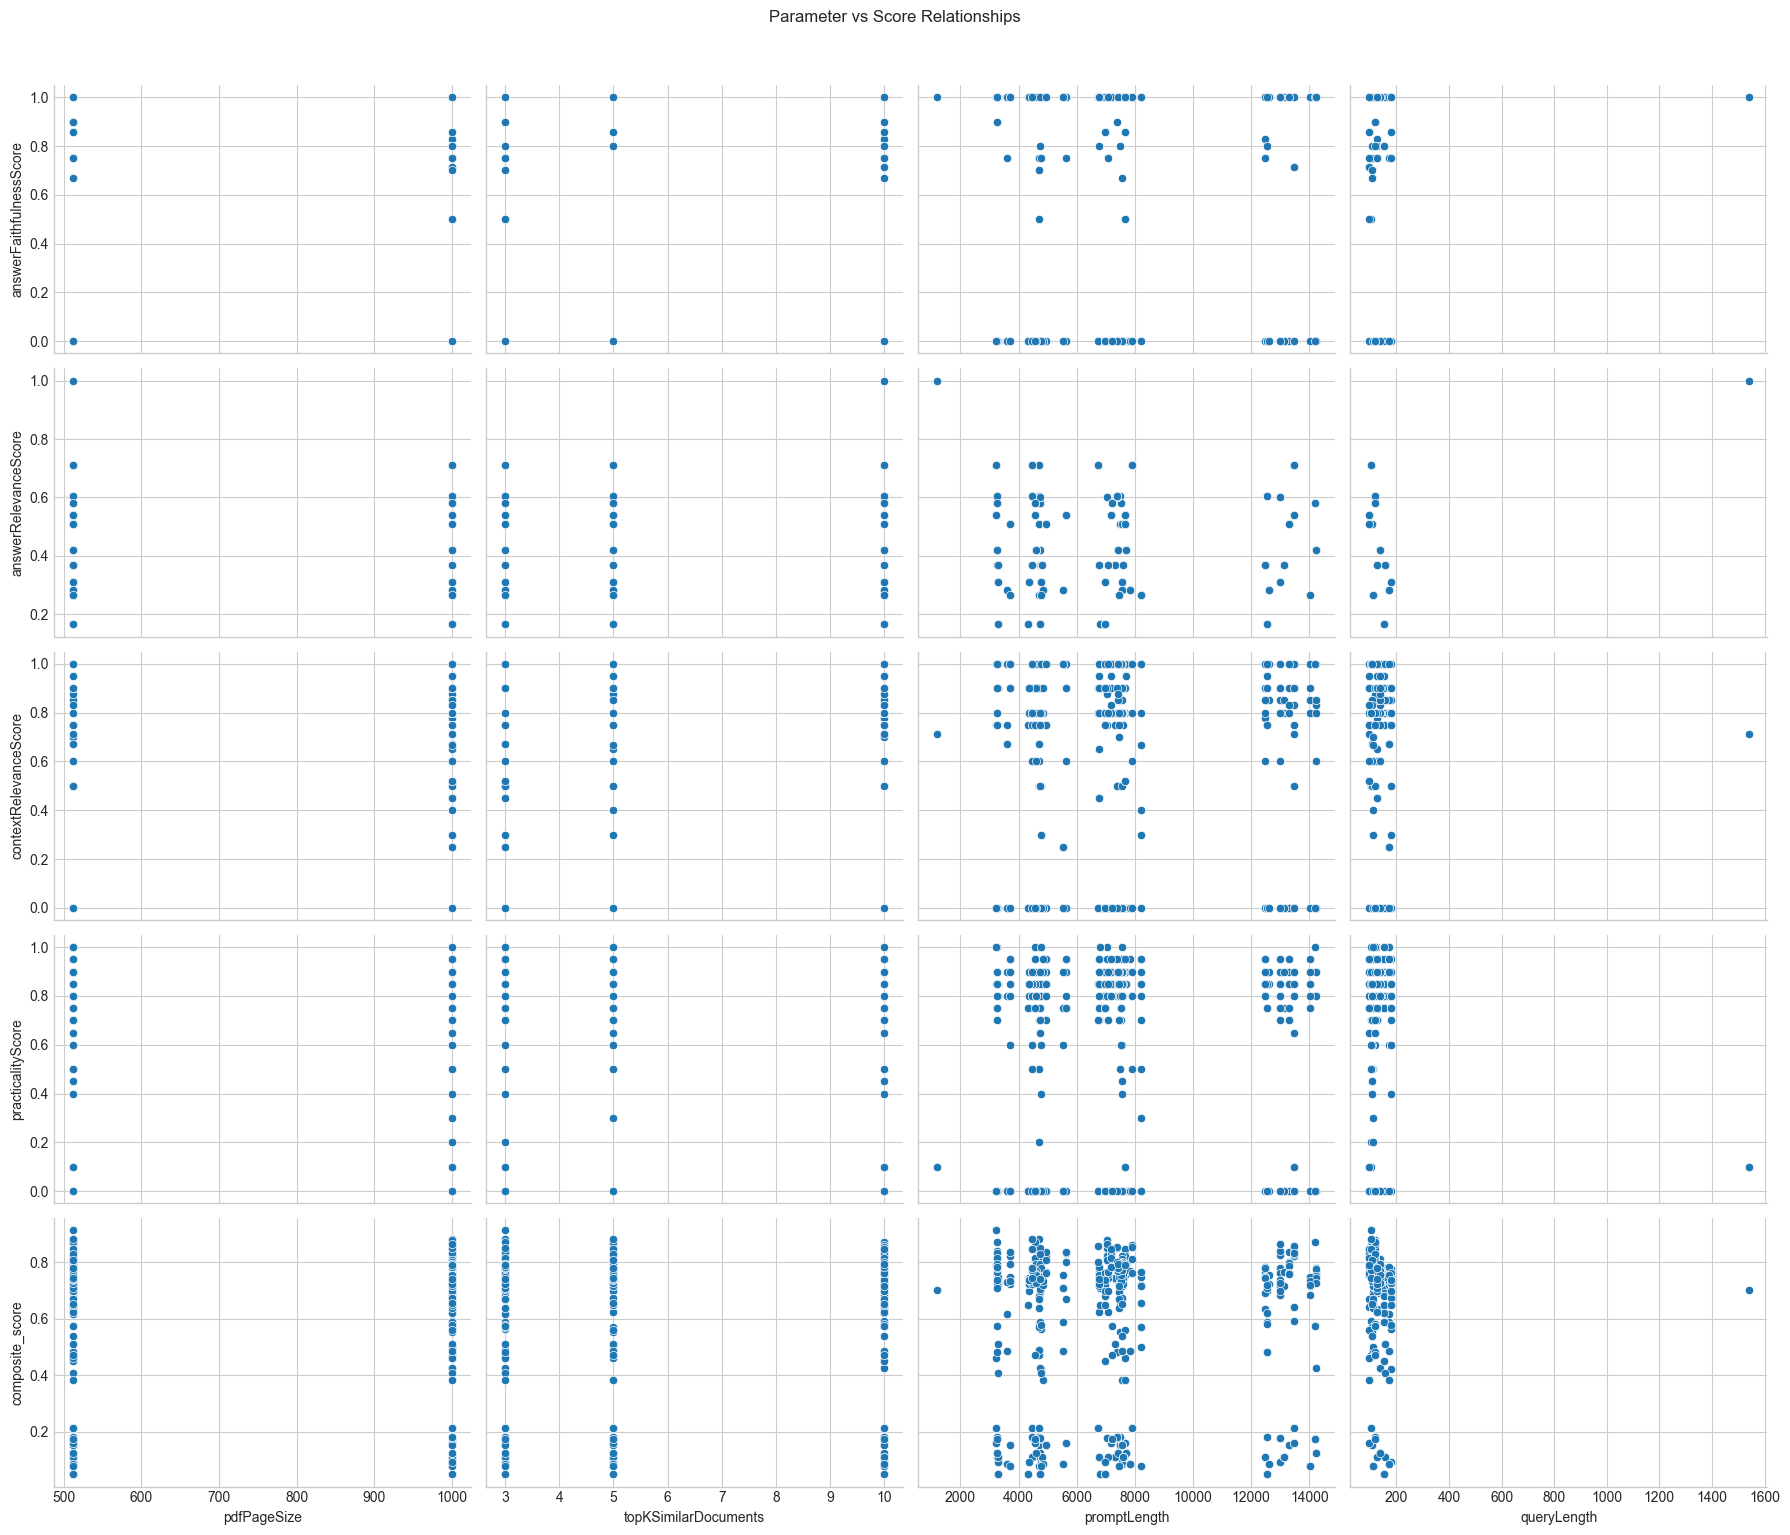



===RESEARCH QUESTION 3 ANALYSIS SUMMARY===

KEY FINDINGS:
1. The most important parameters for overall quality are: queryLength, promptLength, topKSimilarDocuments, pdfPageSize

2. Parameters positively correlated with better outcomes: topKSimilarDocuments, promptLength, pdfPageSize

3. Parameters negatively correlated with outcomes: queryLength

4. For answerFaithfulnessScore, the most important parameters are: promptLength, queryLength

5. For answerRelevanceScore, the most important parameters are: queryLength, promptLength

6. For contextRelevanceScore, the most important parameters are: queryLength, promptLength

7. For practicalityScore, the most important parameters are: queryLength, promptLength

8. Our predictive model explains 0.09 of the variance in the composite quality score

9. Statistically significant parameters: const


===RECOMMENDATIONS===
1. Set pdfPageSize between 512.0 and 1000.0 for best overall results

2. Set topKSimilarDocuments between 5.0 and 10.0 for best

In [9]:
ResearchQuestion3(llm_experiment).answer()